"""Prediction of full load electrical power
output of a base load operated combined 
cycle power plant using machine learning methods :-The dataset contains 9568 data points collected from a Combined Cycle Power Plant 
over 6 years (2006-2011), when the power plant was set to work with full load. 
Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to
predict the net hourly electrical energy output (EP) of
the plant."""
Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [1]:
#importin library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

In [6]:
#getting data
df1 = pd.read_csv('Folds5x2.1_pp.csv')
df1

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [7]:
#getting data
df2 = pd.read_csv('Folds5x2.2_pp.csv')
df2

,AT,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


In [10]:
#concatinating both dataframes into single dataframe
data=pd.concat([df1,df2])
data

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [11]:
data.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [12]:
#data exploration
#there is no categorical variable
data.describe()

,AT,V,AP,RH,EP
count,19136.000000,19136.000000,19136.000000,19136.000000,19136.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452278,12.707561,5.938629,14.599887,17.066549
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19136 entries, 0 to 9567
Data columns (total 5 columns):
AT    19136 non-null float64
V     19136 non-null float64
AP    19136 non-null float64
RH    19136 non-null float64
EP    19136 non-null float64
dtypes: float64(5)
memory usage: 897.0 KB


In [14]:
#Data cleaning - imputing missing value
print(data.isnull().sum())


AT    0
V     0
AP    0
RH    0
EP    0
dtype: int64


In [15]:
#finding unique vale in data frame
data.nunique().sum()

15306

In [16]:
data.apply(lambda x: len(x.unique()))


AT    2773
V      634
AP    2517
RH    4546
EP    4836
dtype: int64

In [17]:
#feature scaling- in this data set ever data is in same scale

In [19]:
#Importing the independent data set 
X = data.iloc[:,:-1].values
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [21]:
Y = data.iloc[:,4].values
Y

array([463.26, 444.37, 488.56, ..., 465.96, 450.93, 451.67])

In [22]:
#spliting the dataset into Training Set and Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)

In [23]:
X_train

array([[  29.71,   71.85, 1008.81,   70.86],
       [  24.2 ,   60.95, 1014.82,   59.42],
       [  17.53,   44.9 , 1020.5 ,   71.1 ],
       ...,
       [  30.47,   68.24, 1009.55,   64.98],
       [  23.45,   45.61, 1012.84,   73.42],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [24]:
X_test

array([[  24.97,   63.86, 1018.64,   52.01],
       [  30.39,   70.98, 1007.55,   72.76],
       [  23.96,   58.33, 1013.37,   59.97],
       ...,
       [  15.42,   39.82, 1012.89,   83.54],
       [  10.87,   37.5 , 1011.43,   95.56],
       [  25.2 ,   57.5 , 1015.19,   59.62]])

In [25]:
Y_train

array([428.49, 448.43, 457.61, ..., 427.94, 454.92, 428.12])

In [26]:
Y_test

array([441.61, 435.48, 446.01, ..., 469.9 , 474.07, 446.26])

In [27]:
# Model Building
#Fitting Multiple Linear Regression to The Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
#Predicting The test set result
y_pred = regressor.predict(X_test)
y_pred

array([445.34035458, 428.92307103, 447.01514147, ..., 464.47114049,
       472.02484496, 444.92721566])

In [29]:
# building the optimal model using backward elimination
# SL = 0.05 and eliminating those features which have p > SL
import statsmodels.formula.api as sm
X= np.append(arr = np.ones((19136,1)).astype(int), values = X, axis = 1)
#np.append(x, x[:,-1:], axis=1)

In [31]:
#independent variables that are statistically significant for dependent variable so now creating optimal matrix
X_opt = X[:,[0,1,2,3,4]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()

In [32]:
#Here important to know lower is the p-value the more significant our independent is going to be with respect to dependent variable. 
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 6.229e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                -56176.
No. Observations:               19136   AIC:                         1.124e+05
Df Residuals:                   19131   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      6.892     65.959      0.000     441.100     468.119
x1            -1.9775      0.011   -182.941      0.000      -1.999      -1.956
x2            -0.2339      0.005    -45.433      0.000      -0.244      -0.224
x3             0.0621      0.007      9.284      0.000       0.049       0.075
x4            -0.1581      0.003    -53.632      0.000      -0.164      -0.152
==============================================================================
Omnibus:                     1778.239   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8173.554
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
"""after completion of backward elimination , looking at p- value ,
r2 and adjusted r2 one can identifythat there is no need to remove any column """  

'after completion of backward elimination , looking at p- value ,\nr2 and adjusted r2 one can identifythat there is no need to remove any column '

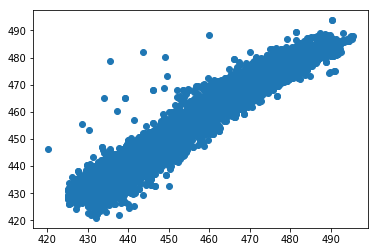

In [34]:
plt.scatter(Y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


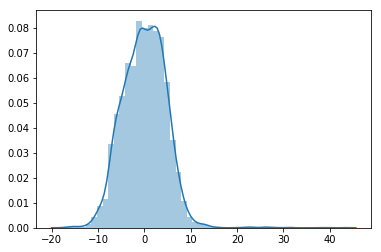

In [54]:
import seaborn as sns
sns.distplot((res))

In [45]:
from sklearn import metrics 
metrics.mean_squared_error(Y_test,y_pred)

21.323163995003018

In [46]:
np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

4.617701159127019

In [52]:
#residuals (ypredict - ytrue) 
res = y_pred - Y_test
res

array([ 3.73035458, -6.55692897,  1.00514147, ..., -5.42885951,
       -2.04515504, -1.33278434])

(array([6.000e+00, 6.000e+00, 1.100e+01, 7.700e+01, 1.860e+02, 5.380e+02,
        7.340e+02, 8.950e+02, 1.043e+03, 1.032e+03, 9.490e+02, 5.590e+02,
        2.260e+02, 6.500e+01, 2.300e+01, 1.200e+01, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-17.45884368, -15.44111864, -13.42339359, -11.40566854,
         -9.3879435 ,  -7.37021845,  -5.3524934 ,  -3.33476836,
         -1.31704331,   0.70068174,   2.71840678,   4.73613183,
          6.75385688,   8.77158192,  10.78930697,  12.80703202,
         14.82475706,  16.84248211,  18.86020716,  20.8779322 ,
         22.89565725,  24.9133823 ,  26.93110734,  28.94883239,
         30.96655744,  32.98428248,  35.00200753,  37.01973258,
         39.03745762,  41.05518267,  43.07290772]),
 <a list of 30 Patch objects>)

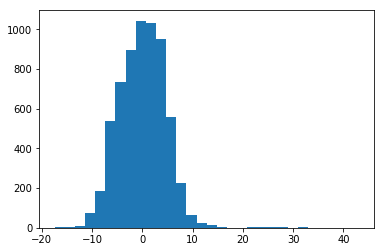

In [53]:
plt.hist(res, bins = 30)


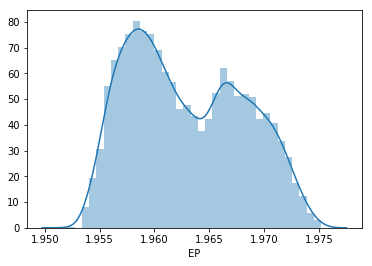

In [56]:
# Improve your model using log transformation of the output and polynomial transformation of the
data['EP'] = np.log1p(data['EP'])
import seaborn as sns
sns.distplot((data['EP']))
